In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.252242,0.030717,0.011001,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.086807,0.062192,0.013201,00:09


In [4]:
import fastbook
fastbook.setup_book()

In [5]:
from fastbook import *

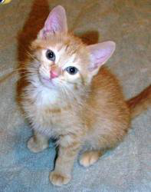

In [6]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [7]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is this a cat?: False.
Probability it's a cat: 0.000089


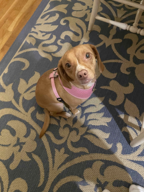

In [17]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img.to_thumb(192)

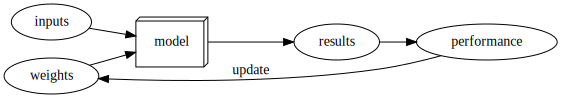

In [18]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

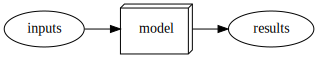

In [19]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

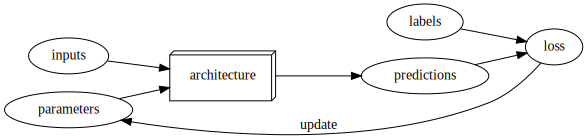

In [20]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')